# Sustainable Energy Planning in Cameroon: A Big Data Approach Using Spark (Group 9)
## A Comprehensive Analysis of Energy Consumption, Demand Forecasting, and Infrastructure Recommendations

### Import Libraries and Initialize SparkSession

This cell imports the necessary libraries (`pyspark`, `pandas`, `matplotlib`, `seaborn`) and initializes a SparkSession, which is the entry point for working with Spark. The SparkSession is configured with the application name `"DataWarehouse"`.

### Define Schema for `weather_dim` Table

This cell also defines the schema for the `weather_dim` table using PySpark's `StructType` and `StructField`. The schema includes columns for `date`, `city`, `temperature_C`, `wind_speed_km_h`, and `solar_radiation_W_m2`.

### Load Data into DataFrames

This cell loads data from CSV files into PySpark DataFrames. The following tables are loaded:
- `weather_dim`
- `location_dim`
- `customer_dim`
- `energy_sources_dim`
- `consumption_dim`
- `grid_infrastructure_dim`
- `energy_efficiency_dim`
- `load_shedding_dim`
- `maintenance_outage_dim`
- `demand_and_supply`

The `inferSchema=True` option is used to automatically infer the schema for most tables, except for `weather_dim`, which has a predefined schema.

### Register DataFrames as Temporary Views

This cell registers each DataFrame as a temporary view, allowing SQL queries to be executed against them. The views are named after their respective tables (e.g., `weather_dim`, `location_dim`, etc.).

In [4]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *

# Create SparkSession
spark = SparkSession.builder \
    .appName("DataWarehouse") \
    .getOrCreate()

# Define schema for the weather_dim table
weather_dim_schema = StructType([
    StructField("date", DateType(), True),
    StructField("city", StringType(), True),
    StructField("temperature_C", FloatType(), True),
    StructField("wind_speed_km_h", FloatType(), True),
    StructField("solar_radiation_W_m2", FloatType(), True)
])

# Load data into DataFrames
weather_dim = spark.read.csv("./work/weather_dim.csv", schema=weather_dim_schema, header=True)
location_dim = spark.read.csv("./work/location_dim.csv", inferSchema=True, header=True)
customer_dim = spark.read.csv("./work/customer_dim.csv", inferSchema=True, header=True)
energy_sources_dim = spark.read.csv("./work/energy_sources_dim.csv", inferSchema=True, header=True)
consumption_dim = spark.read.csv("./work/consumption_dim.csv", inferSchema=True, header=True)
grid_infrastructure_dim = spark.read.csv("./work/grid_infrastructure_dim.csv", inferSchema=True, header=True)
energy_efficiency_dim = spark.read.csv("./work/energy_efficiency_dim.csv", inferSchema=True, header=True)
load_shedding_dim = spark.read.csv("./work/load_shedding_dim.csv", inferSchema=True, header=True)
maintenance_outage_dim = spark.read.csv("./work/maintenance_outage_dim.csv", inferSchema=True, header=True)
demand_and_supply = spark.read.csv("./work/demand_and_supply.csv", inferSchema=True, header=True)

# Register DataFrames as temporary views for SQL queries
weather_dim.createOrReplaceTempView("weather_dim")
location_dim.createOrReplaceTempView("location_dim")
customer_dim.createOrReplaceTempView("customer_dim")
energy_sources_dim.createOrReplaceTempView("energy_sources_dim")
consumption_dim.createOrReplaceTempView("consumption_dim")
grid_infrastructure_dim.createOrReplaceTempView("grid_infrastructure_dim")
energy_efficiency_dim.createOrReplaceTempView("energy_efficiency_dim")
load_shedding_dim.createOrReplaceTempView("load_shedding_dim")
maintenance_outage_dim.createOrReplaceTempView("maintenance_outage_dim")
demand_and_supply.createOrReplaceTempView("demand_and_supply")


### Total Energy Consumption by Region

This cell calculates the total energy consumption (`total_consumption_MWh`) for each region by joining the `consumption_dim` and `location_dim` tables. The results are grouped by region and ordered by total consumption in descending order.

**Output**: A table showing the total energy consumption for each region.

In [5]:
spark.sql("""
SELECT loc.region, SUM(cons.total_consumption_MWh) AS total_consumption
FROM consumption_dim cons
JOIN location_dim loc ON cons.city = loc.city
GROUP BY loc.region
ORDER BY total_consumption DESC
""").show()
spark.sql("""
SELECT loc.region, SUM(cons.total_consumption_MWh) AS total_consumption
FROM consumption_dim cons
JOIN location_dim loc ON cons.city = loc.city
GROUP BY loc.region
ORDER BY total_consumption DESC
""").show()

+--------+------------------+
|  region| total_consumption|
+--------+------------------+
|    West|136666.31999999998|
|   North|         134367.87|
|Littoral|          122378.9|
| Adamawa|         118379.03|
|   South|112144.72999999998|
|  Centre|         102927.58|
|    East|          81909.55|
+--------+------------------+

+--------+------------------+
|  region| total_consumption|
+--------+------------------+
|    West|136666.31999999998|
|   North|         134367.87|
|Littoral|          122378.9|
| Adamawa|         118379.03|
|   South|112144.72999999998|
|  Centre|         102927.58|
|    East|          81909.55|
+--------+------------------+



### Peak Energy Demand by City and Year

This cell calculates the peak energy demand (`peak_consumption_MM`) for each city and year from the `consumption_dim` table. The results are grouped by city and year, and ordered by peak demand in descending order.

**Output**: A table showing the peak energy demand for each city and year.

In [6]:
spark.sql("""
SELECT city, year, MAX(peak_consumption_MW) AS peak_demand
FROM consumption_dim
GROUP BY city, year
ORDER BY peak_demand DESC
""").show()

+---------+----+-----------+
|     city|year|peak_demand|
+---------+----+-----------+
|  Ebolowa|2022|     994.37|
|   Garoua|2020|     980.55|
|  Yaoundé|2020|     970.43|
|Bafoussam|2021|     936.65|
|  Ebolowa|2021|     928.56|
|   Garoua|2019|     913.21|
|  Ebolowa|2020|     907.83|
|  Ebolowa|2019|      896.2|
|   Douala|2023|     860.19|
|  Bertoua|2019|      832.9|
|   Garoua|2021|     825.02|
|  Yaoundé|2023|     801.56|
|   Garoua|2023|     738.98|
|  Yaoundé|2021|     688.73|
|   Douala|2022|     680.04|
|Bafoussam|2020|     609.29|
|   Garoua|2022|      605.1|
|Bafoussam|2019|      575.9|
|  Bertoua|2020|     553.58|
|  Bertoua|2022|     526.41|
+---------+----+-----------+
only showing top 20 rows



### Average Energy Efficiency by Region

This cell calculates the average energy efficiency (`avg_efficiency`) for each region from the `energy_efficiency_dim` table. The results are grouped by region and ordered by average efficiency in descending order.

**Output**: A table showing the average energy efficiency for each region.

In [7]:
spark.sql("""
SELECT region, AVG(efficiency_rating) AS avg_efficiency
FROM energy_efficiency_dim
GROUP BY region
ORDER BY avg_efficiency DESC
""").show()

+------+--------------+
|region|avg_efficiency|
+------+--------------+
|Centre|  74.252582916|
+------+--------------+



### Average Solar Radiation by City and Month

This cell calculates the average solar radiation (`avg_solar_radiation_W_m2`) for each city and month from the `weather_dim` table. The results are grouped by city and month, and ordered by city and month.

**Output**: A table showing the average solar radiation for each city and month.

In [8]:
spark.sql("""
SELECT 
    city, 
    MONTH(date) AS month, 
    AVG(solar_radiation_W_m2) AS avg_solar_radiation
FROM 
    weather_dim
GROUP BY 
    city, MONTH(date)
ORDER BY 
    city, month
""").show()


+---------+-----+-------------------+
|     city|month|avg_solar_radiation|
+---------+-----+-------------------+
|Bafoussam|    1|  508.0639237434633|
|Bafoussam|    2|  536.4671759212719|
|Bafoussam|    3|  559.3094620243196|
|Bafoussam|    4|  538.0498338063558|
|Bafoussam|    5|  558.4841925918415|
|Bafoussam|    6|  535.8764442019992|
|Bafoussam|    7|  557.7971498632944|
|Bafoussam|    8|  557.3978492572743|
|Bafoussam|    9|  561.8018329196506|
|Bafoussam|   10|  550.5554847717285|
|Bafoussam|   11|  535.3306676228841|
|Bafoussam|   12|  535.5183862665648|
|  Bertoua|    1|  555.2701061617944|
|  Bertoua|    2|  559.1822364807128|
|  Bertoua|    3|  558.6004303962953|
|  Bertoua|    4|  554.1686113993327|
|  Bertoua|    5|   542.459352800923|
|  Bertoua|    6|  511.8334999508328|
|  Bertoua|    7|  548.4612376715547|
|  Bertoua|    8| 508.59715074108493|
+---------+-----+-------------------+
only showing top 20 rows



### Load Shedding Frequency and Duration by Region

This cell calculates the total frequency and duration of load shedding for each region from the `load_shedding_dim` table. The results are grouped by region and ordered by total frequency in descending order.

**Output**: A table showing the total frequency and duration of load shedding for each region.

In [9]:
spark.sql("""
SELECT 
    region, 
    SUM(frequency) AS total_frequency, 
    SUM(duration_hours) AS total_duration
FROM 
    load_shedding_dim
GROUP BY 
    region
ORDER BY 
    total_frequency DESC
""").show()


+--------+---------------+--------------+
|  region|total_frequency|total_duration|
+--------+---------------+--------------+
|Littoral|             20|            16|
+--------+---------------+--------------+



### Total Energy Consumption by Region and City

This cell calculates the total energy consumption (`total_consumption_MWh`) for each region and city by joining the `consumption_dim` and `location_dim` tables. The results are grouped using `ROLLUP` to show subtotals for each region and city.

**Output**: A table showing the total energy consumption for each region and city, including subtotals.

In [10]:
spark.sql("""
SELECT 
    loc.region, 
    loc.city, 
    SUM(cons.total_consumption_MWh) AS total_consumption
FROM 
    consumption_dim cons
JOIN 
    location_dim loc 
ON 
    cons.city = loc.city
GROUP BY 
    ROLLUP(loc.region, loc.city)
ORDER BY 
    loc.region, loc.city
""").show()


+--------+----------+------------------+
|  region|      city| total_consumption|
+--------+----------+------------------+
|    NULL|      NULL| 808773.9799999996|
| Adamawa|      NULL|         118379.03|
| Adamawa|Ngaoundéré|         118379.03|
|  Centre|      NULL|         102927.58|
|  Centre|   Yaoundé|         102927.58|
|    East|      NULL|          81909.55|
|    East|   Bertoua|          81909.55|
|Littoral|      NULL|          122378.9|
|Littoral|    Douala|          122378.9|
|   North|      NULL|         134367.87|
|   North|    Garoua|         134367.87|
|   South|      NULL|112144.72999999998|
|   South|   Ebolowa|112144.72999999998|
|    West|      NULL|136666.31999999998|
|    West| Bafoussam|136666.31999999998|
+--------+----------+------------------+



### Renewable vs. Non-Renewable Energy Potential by Region

This cell calculates the total energy potential (`total_potential_kW`) for renewable and non-renewable sources by region from the `energy_sources_dim` table. The results are grouped using `CUBE` to show subtotals for each region and energy type.

**Output**: A table showing the total energy potential for renewable and non-renewable sources by region.

In [11]:
spark.sql("""
SELECT region, renewable, SUM(potential_kW) AS total_potential
FROM energy_sources_dim
GROUP BY CUBE(region, renewable)
ORDER BY region, renewable
""").show()

+--------+---------+---------------+
|  region|renewable|total_potential|
+--------+---------+---------------+
|    NULL|     NULL|         350000|
|    NULL|    false|         120000|
|    NULL|     true|         230000|
|  Centre|     NULL|         100000|
|  Centre|     true|         100000|
|Littoral|     NULL|          80000|
|Littoral|     true|          80000|
|   North|     NULL|          50000|
|   North|     true|          50000|
|   South|     NULL|         120000|
|   South|    false|         120000|
+--------+---------+---------------+



### Clustering of Cities by Energy Consumption and Population

This cell performs K-Means clustering to group cities based on their energy consumption (`total_consumption_MWh`), population, and temperature (`temperature_C`). The results are visualized using a scatter plot.

**Output**: A scatter plot showing clusters of cities based on energy consumption and population.

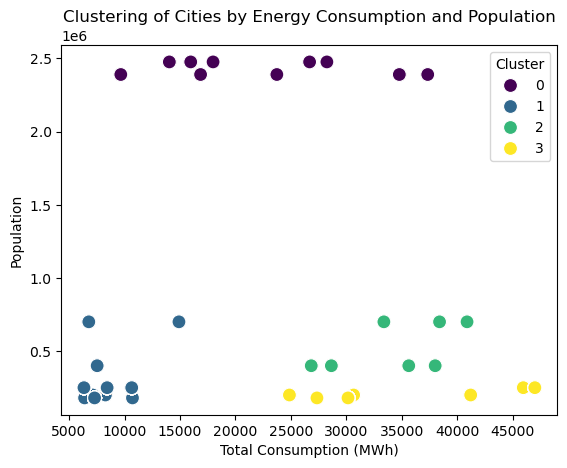

In [12]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.clustering import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
query = """
SELECT 
    c.city, 
    c.total_consumption_MWh, 
    l.population, 
    w.temperature_C
FROM 
    consumption_dim c
JOIN 
    location_dim l ON c.city = l.city
JOIN 
    weather_dim w ON c.city = w.city
"""
data = spark.sql(query)

# Assemble features
assembler = VectorAssembler(
    inputCols=["total_consumption_MWh", "population", "temperature_C"],
    outputCol="features_raw"
)
assembled_data = assembler.transform(data)

# Scale features
scaler = StandardScaler(inputCol="features_raw", outputCol="features")
scaled_data = scaler.fit(assembled_data).transform(assembled_data)

# Apply K-Means
kmeans = KMeans(k=4, seed=1, featuresCol="features", predictionCol="cluster")
model = kmeans.fit(scaled_data)
clustered_data = model.transform(scaled_data)

# Convert to Pandas for visualization
clustered_df = clustered_data.select(
    "city", "total_consumption_MWh", "population", "temperature_C", "cluster"
).toPandas()

# Visualization
sns.scatterplot(
    data=clustered_df,
    x="total_consumption_MWh",
    y="population",
    hue="cluster",
    palette="viridis",
    s=100
)
plt.title("Clustering of Cities by Energy Consumption and Population")
plt.xlabel("Total Consumption (MWh)")
plt.ylabel("Population")
plt.legend(title="Cluster")
plt.show()


### Electricity Demand Forecast

This cell forecasts future electricity demand using a linear regression model and a moving average. The data is aggregated by day from the `demand_and_supply` table, and the forecast is visualized alongside the actual demand and moving average.

**Output**: A line chart showing actual demand, moving average, and forecasted demand.

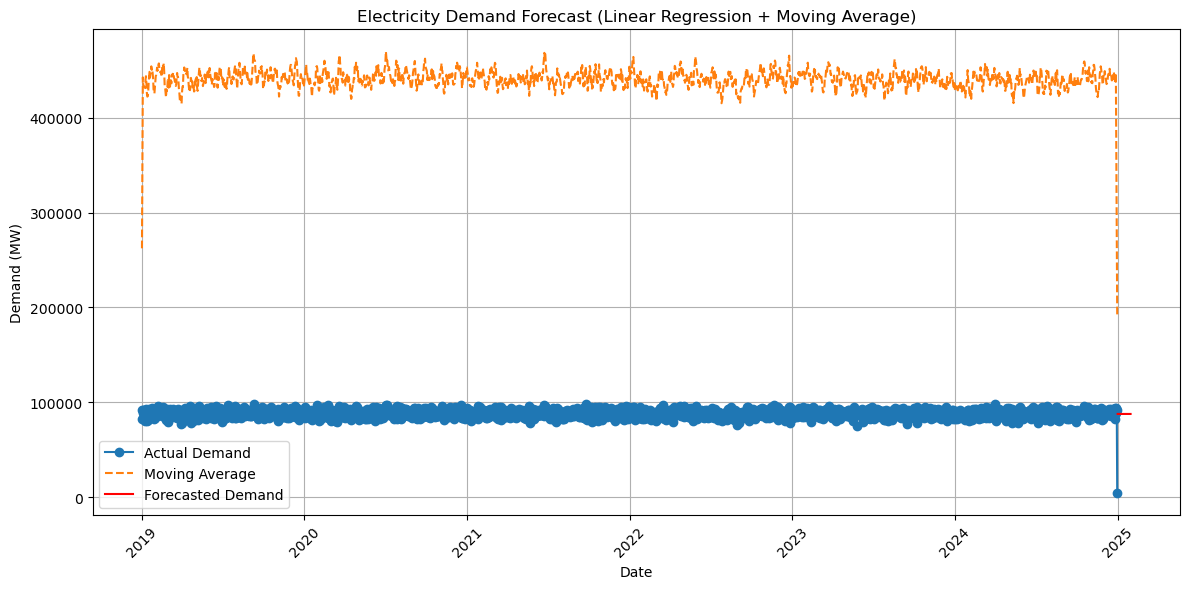

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from pyspark.sql.functions import col, to_date, sum as sql_sum
from pyspark.sql.window import Window
import pandas as pd

# Query to aggregate data by day
query = """
SELECT
    DATE(date) AS day,
    SUM(demand_MW) AS total_demand
FROM
    demand_and_supply
GROUP BY
    DATE(date)
ORDER BY
    day
"""
time_series_data = spark.sql(query)

# Calculate a moving average for smoothing
window_spec = Window.orderBy("day").rowsBetween(-2, 2)
time_series_data = time_series_data.withColumn(
    "moving_avg",
    sql_sum(col("total_demand")).over(window_spec)
)

# Convert to Pandas for visualization
time_series_pd = time_series_data.toPandas()

# Ensure 'day' column is in datetime format
time_series_pd["day"] = pd.to_datetime(time_series_pd["day"])

# Create a linear regression model to predict future values
days = np.arange(len(time_series_pd))
demand = time_series_pd["total_demand"].values

# Fit a simple linear regression model
coef = np.polyfit(days, demand, 1)  # Linear regression (degree 1)
linear_model = np.poly1d(coef)

# Predict future demand for the next 30 days
future_days = np.arange(len(time_series_pd), len(time_series_pd) + 30)
future_demand = linear_model(future_days)

# Generate future dates
future_dates = [time_series_pd["day"].iloc[-1] + pd.Timedelta(days=i) for i in range(1, 31)]

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(
    time_series_pd["day"], 
    demand, 
    label="Actual Demand", 
    marker='o'
)
plt.plot(
    time_series_pd["day"], 
    time_series_pd["moving_avg"], 
    label="Moving Average", 
    linestyle='--'
)
plt.plot(
    future_dates, 
    future_demand, 
    label="Forecasted Demand", 
    linestyle='-', 
    color="red"
)

plt.title("Electricity Demand Forecast (Linear Regression + Moving Average)")
plt.xlabel("Date")
plt.ylabel("Demand (MW)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Frequent Energy Source Combinations

This cell uses the FP-Growth algorithm to identify frequent combinations of energy sources by region from the `energy_sources_dim` table. The results are visualized using a bar chart.

**Output**: A bar chart showing frequent energy source combinations and their frequency.

Frequent Itemsets:
+------------+----+
|       items|freq|
+------------+----+
|   [Thermal]|   1|
|[Hydropower]|   1|
|     [Solar]|   1|
|      [Wind]|   1|
+------------+----+

Association Rules:
+----------+----------+----------+----+-------+
|antecedent|consequent|confidence|lift|support|
+----------+----------+----------+----+-------+
+----------+----------+----------+----+-------+



/tmp/ipykernel_609/4154498563.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


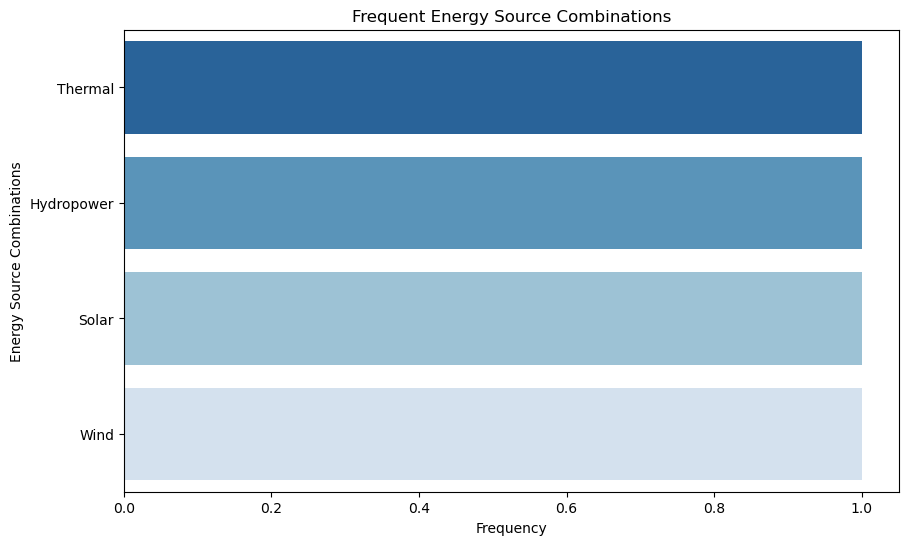

In [16]:
from pyspark.sql import SparkSession
from pyspark.ml.fpm import FPGrowth
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("EnergySourceAnalysis") \
    .getOrCreate()

# SQL query to aggregate energy sources by region
query = """
SELECT region, COLLECT_SET(energy_source) AS items
FROM energy_sources_dim
GROUP BY region
"""
transaction_data = spark.sql(query)

# Apply FP-Growth
fp_growth = FPGrowth(itemsCol="items", minSupport=0.2, minConfidence=0.6)
model = fp_growth.fit(transaction_data)

# Display frequent itemsets
print("Frequent Itemsets:")
model.freqItemsets.show()

# Display association rules
print("Association Rules:")
model.associationRules.show()

# Convert frequent itemsets to Pandas DataFrame for visualization
freq_itemsets = model.freqItemsets.toPandas()

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(
    x="freq",
    y=freq_itemsets["items"].apply(lambda x: ', '.join(x)),
    data=freq_itemsets,
    palette="Blues_r"
)
plt.title("Frequent Energy Source Combinations")
plt.xlabel("Frequency")
plt.ylabel("Energy Source Combinations")
plt.show()

### Energy Efficiency Heatmap

This cell creates a heatmap to visualize energy efficiency (`energy_savings_percent`) by region and efficiency rating from the `energy_efficiency_dim` table.

**Output**: A heatmap showing energy efficiency by region and rating.

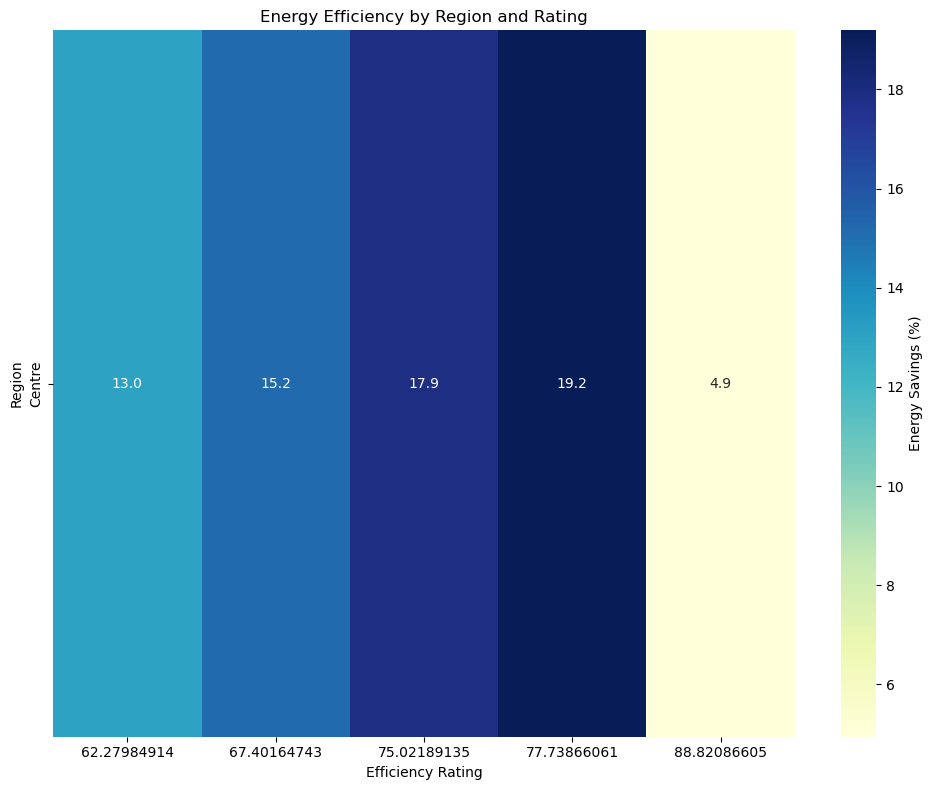

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from Spark table into Pandas
efficiency_data = spark.sql("SELECT * FROM energy_efficiency_dim").toPandas()

# Pivot data for heatmap
heatmap_data = efficiency_data.pivot_table(
    index="region",
    columns="efficiency_rating",
    values="energy_savings_percent",
    aggfunc="mean"  # Aggregation function to handle duplicates, e.g., mean
)

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    cmap="YlGnBu",
    cbar_kws={'label': 'Energy Savings (%)'}
)
plt.title("Energy Efficiency by Region and Rating")
plt.xlabel("Efficiency Rating")
plt.ylabel("Region")
plt.tight_layout()
plt.show()


### Clustering of Cities with City Names

This cell enhances the clustering visualization by adding city names as text labels to the scatter plot. The cities are grouped based on energy consumption and population.

**Output**: A scatter plot with city names, showing clusters of cities based on energy consumption and population.

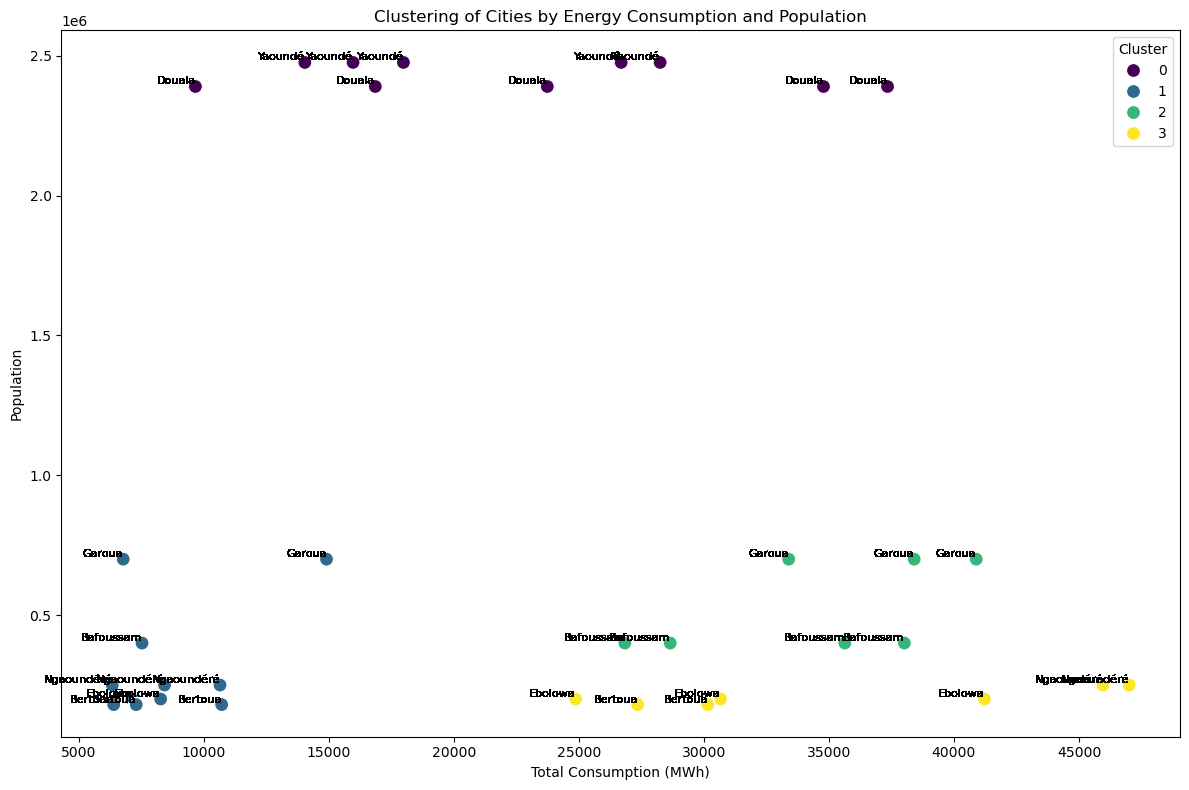

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization with City Names
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=clustered_df,
    x="total_consumption_MWh",
    y="population",
    hue="cluster",
    palette="viridis",
    s=100
)

# Add city names as text labels
for i, row in clustered_df.iterrows():
    plt.text(
        x=row["total_consumption_MWh"],
        y=row["population"],
        s=row["city"],
        fontsize=8,
        ha='right',
        va='bottom'
    )

plt.title("Clustering of Cities by Energy Consumption and Population")
plt.xlabel("Total Consumption (MWh)")
plt.ylabel("Population")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


### Yearly Energy Consumption Over Time

This cell calculates the total energy consumption (`total_consumption_MWh`) for each year from the `consumption_dim` table. The results are visualized using a line chart.

**Output**: A line chart showing yearly energy consumption trends.

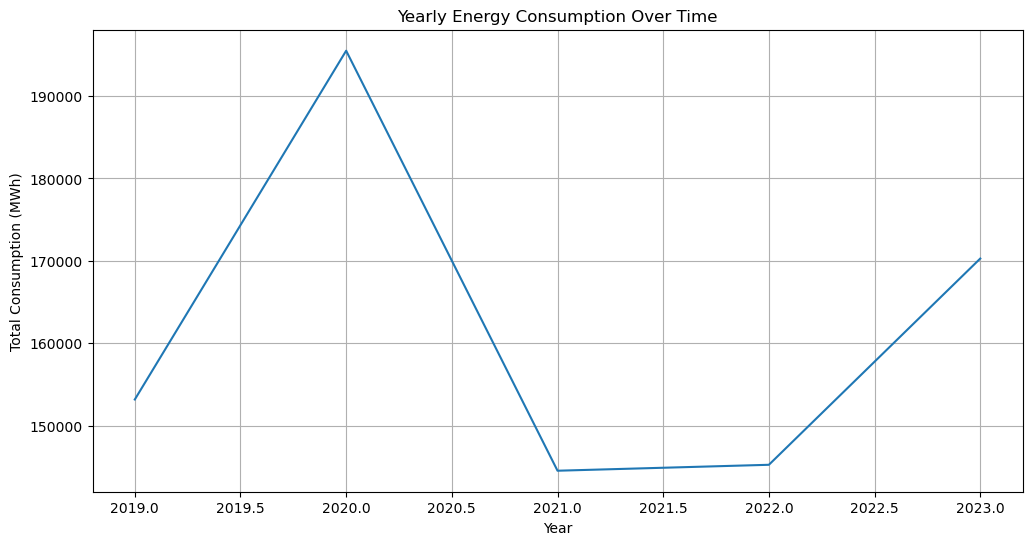

In [25]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns

# Create SparkSession
spark = SparkSession.builder.appName("EnergyAnalysis").getOrCreate()

# Query: Yearly energy consumption over time
query = """
SELECT 
    year, 
    SUM(total_consumption_MWh) AS total_consumption
FROM consumption_dim
GROUP BY year
ORDER BY year
"""
consumption_trends = spark.sql(query).toPandas()

# Visualization: Line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=consumption_trends, x="year", y="total_consumption")
plt.title("Yearly Energy Consumption Over Time")
plt.xlabel("Year")
plt.ylabel("Total Consumption (MWh)")
plt.grid(True)
plt.show()

### Temperature vs. Energy Consumption

This cell analyzes the relationship between temperature (`temperature_C`) and energy consumption (`total_consumption_MWh`) by joining the `weather_dim` and `consumption_dim` tables. The results are visualized using a scatter plot.

**Output**: A scatter plot showing the relationship between temperature and energy consumption.

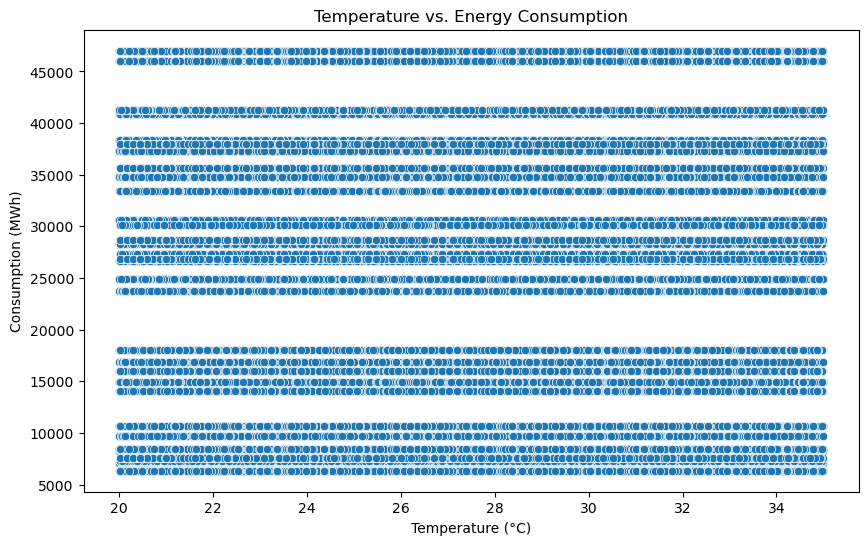

In [26]:
# Query: Weather vs. energy consumption
query = """
SELECT 
    w.temperature_C, 
    w.solar_radiation_W_m2, 
    c.total_consumption_MWh
FROM weather_dim w
JOIN consumption_dim c ON w.city = c.city
"""
weather_consumption = spark.sql(query).toPandas()

# Visualization: Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=weather_consumption, x="temperature_C", y="total_consumption_MWh")
plt.title("Temperature vs. Energy Consumption")
plt.xlabel("Temperature (°C)")
plt.ylabel("Consumption (MWh)")
plt.show()

### Renewable vs. Non-Renewable Energy Potential by Region

This cell calculates the total energy potential (`total_potential_kW`) for renewable and non-renewable sources by region from the `energy_sources_dim` table. The results are visualized using a stacked bar chart.

**Output**: A stacked bar chart showing renewable and non-renewable energy potential by region.

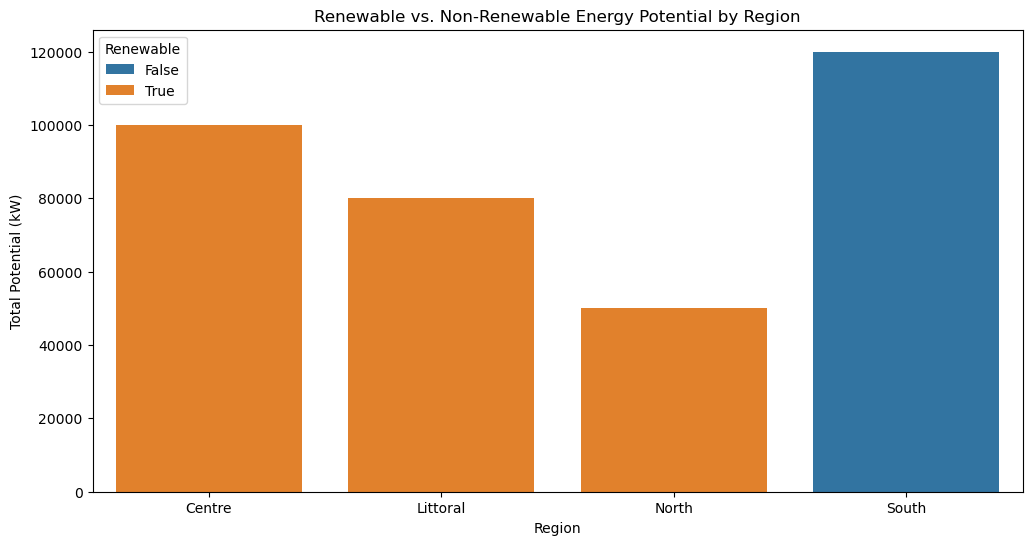

In [27]:
# Query: Renewable vs. non-renewable energy potential by region
query = """
SELECT 
    region, 
    renewable, 
    SUM(potential_kW) AS total_potential
FROM energy_sources_dim
GROUP BY region, renewable
ORDER BY region, renewable
"""
energy_potential = spark.sql(query).toPandas()

# Visualization: Stacked bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=energy_potential, x="region", y="total_potential", hue="renewable")
plt.title("Renewable vs. Non-Renewable Energy Potential by Region")
plt.xlabel("Region")
plt.ylabel("Total Potential (kW)")
plt.legend(title="Renewable")
plt.show()

### Energy Efficiency vs. Savings

This cell calculates the average energy savings (`avg_savings`) for each efficiency rating from the `energy_efficiency_dim` table. The results are visualized using a bar chart.

**Output**: A bar chart showing energy efficiency vs. savings.

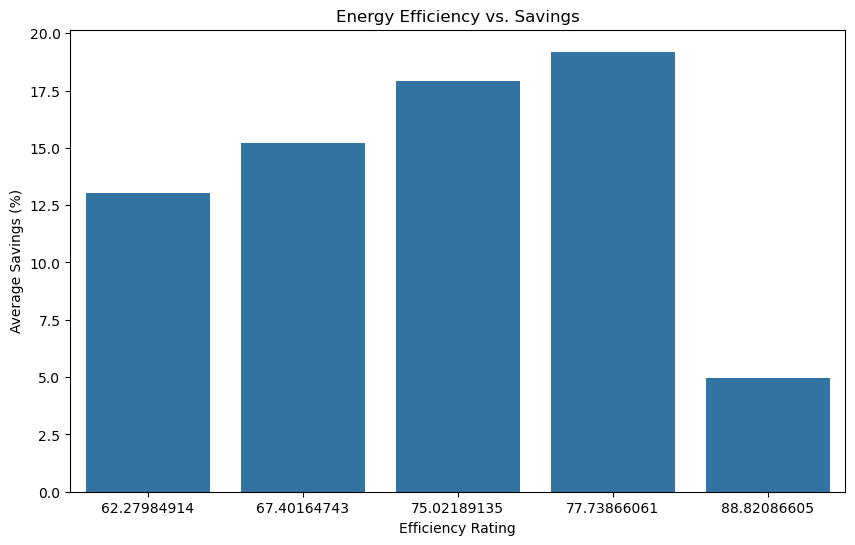

In [28]:
# Query: Energy efficiency vs. savings
query = """
SELECT 
    efficiency_rating, 
    AVG(energy_savings_percent) AS avg_savings
FROM energy_efficiency_dim
GROUP BY efficiency_rating
ORDER BY efficiency_rating
"""
efficiency_savings = spark.sql(query).toPandas()

# Visualization: Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=efficiency_savings, x="efficiency_rating", y="avg_savings")
plt.title("Energy Efficiency vs. Savings")
plt.xlabel("Efficiency Rating")
plt.ylabel("Average Savings (%)")
plt.show()

### Load Shedding Impact on Consumption

This cell analyzes the impact of load shedding on energy consumption by joining the `load_shedding_dim`, `location_dim`, and `consumption_dim` tables. The results are visualized using a heatmap.

**Output**: A heatmap showing the impact of load shedding on energy consumption by region and frequency.

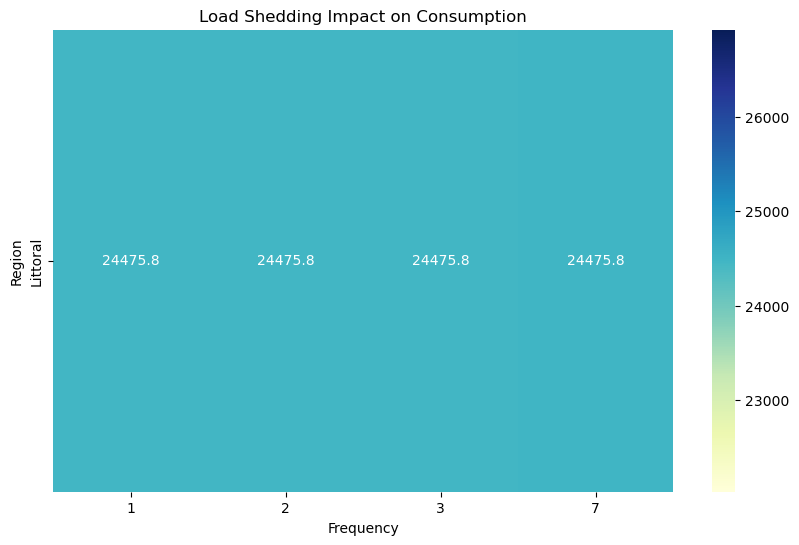

In [37]:
# Query: Aggregate further to remove duplicates
query = """
SELECT 
    l.region, 
    l.frequency, 
    AVG(l.duration_hours) AS avg_duration_hours, 
    AVG(c.total_consumption_MWh) AS avg_consumption
FROM load_shedding_dim l
JOIN location_dim loc ON l.region = loc.region
JOIN consumption_dim c ON loc.city = c.city
GROUP BY l.region, l.frequency
ORDER BY l.region
"""
load_shedding_impact = spark.sql(query).toPandas()

# Create pivot table
pivot_table = load_shedding_impact.pivot(index="region", columns="frequency", values="avg_consumption")

# Visualization: Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Load Shedding Impact on Consumption")
plt.xlabel("Frequency")
plt.ylabel("Region")
plt.show()

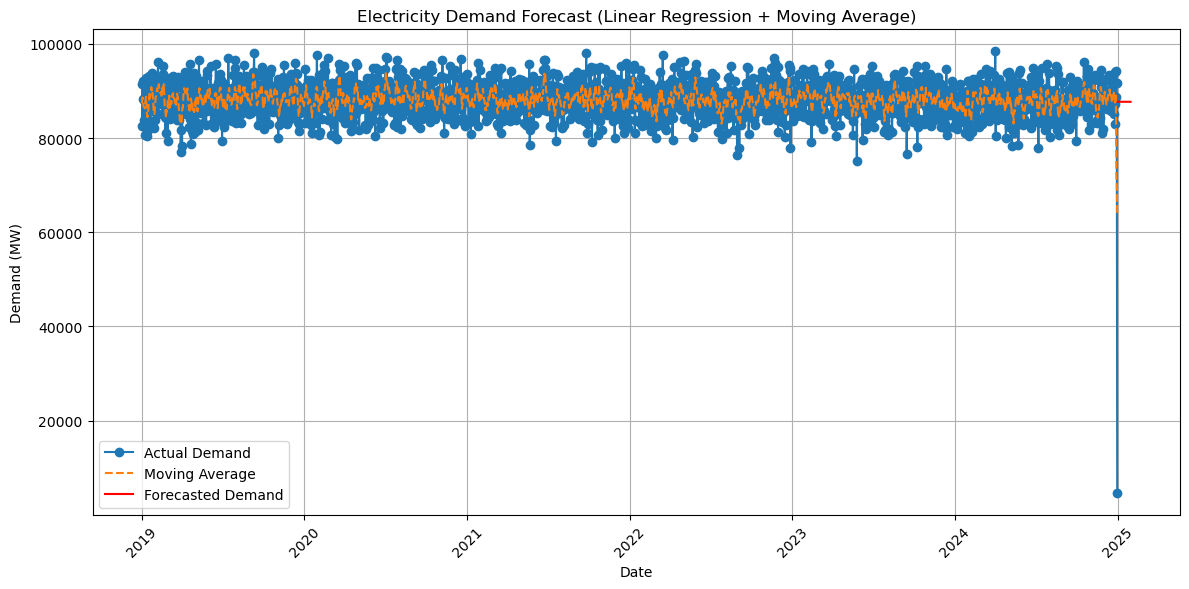

In [33]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F  # Import F for PySpark functions
from pyspark.sql.window import Window
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create SparkSession
spark = SparkSession.builder.appName("EnergyAnalysis").getOrCreate()

# Query: Daily energy demand
query = """
SELECT 
    DATE(date) AS day, 
    SUM(demand_MW) AS total_demand
FROM demand_and_supply
GROUP BY DATE(date)
ORDER BY day
"""
demand_data = spark.sql(query)

# Prepare data for modeling
window_spec = Window.orderBy("day").rowsBetween(-2, 2)
demand_data = demand_data.withColumn("moving_avg", F.avg(F.col("total_demand")).over(window_spec))

# Convert to Pandas for visualization
demand_pd = demand_data.toPandas()
demand_pd["day"] = pd.to_datetime(demand_pd["day"])

# Fit a linear regression model
days = np.arange(len(demand_pd))
demand = demand_pd["total_demand"].values
coef = np.polyfit(days, demand, 1)  # Linear regression (degree 1)
linear_model = np.poly1d(coef)

# Predict future demand for the next 30 days
future_days = np.arange(len(demand_pd), len(demand_pd) + 30)
future_demand = linear_model(future_days)

# Generate future dates
future_dates = [demand_pd["day"].iloc[-1] + pd.Timedelta(days=i) for i in range(1, 31)]

# Visualization: Forecasted demand
plt.figure(figsize=(12, 6))
plt.plot(demand_pd["day"], demand, label="Actual Demand", marker='o')
plt.plot(demand_pd["day"], demand_pd["moving_avg"], label="Moving Average", linestyle='--')
plt.plot(future_dates, future_demand, label="Forecasted Demand", linestyle='-', color="red")
plt.title("Electricity Demand Forecast (Linear Regression + Moving Average)")
plt.xlabel("Date")
plt.ylabel("Demand (MW)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Check for NULL Values

This cell checks for NULL values in key columns of the `consumption_dim` table. Rows with NULL values are dropped to ensure data quality.

**Output**: A table showing the count of NULL values and the cleaned DataFrame.

In [31]:
# Check for NULLs in key columns
null_check = spark.sql("""
SELECT 
    COUNT(*) AS total_rows,
    COUNT(city) AS non_null_cities,
    COUNT(total_consumption_MWh) AS non_null_consumption
FROM consumption_dim
""")
null_check.show()

# Drop rows with NULL values (if necessary)
cleaned_df = spark.sql("SELECT * FROM consumption_dim").na.drop()
cleaned_df.show()

+----------+---------------+--------------------+
|total_rows|non_null_cities|non_null_consumption|
+----------+---------------+--------------------+
|        35|             35|                  35|
+----------+---------------+--------------------+

+-------+----+---------------------+-------------------+------------------------+
|   city|year|total_consumption_MWh|peak_consumption_MW|off_peak_consumption_MWh|
+-------+----+---------------------+-------------------+------------------------+
|Yaoundé|2019|             26689.19|             351.74|                13594.04|
|Yaoundé|2020|             15967.53|             970.43|                 6214.86|
|Yaoundé|2021|             14039.41|             688.73|                 7429.58|
|Yaoundé|2022|             17982.58|             192.22|                 4828.24|
|Yaoundé|2023|             28248.87|             801.56|                 10130.5|
| Douala|2019|             16856.54|              182.8|                 6686.22|
| Douala|20

### Total Energy Consumption by Region (Bar Chart)

This cell calculates the total energy consumption (`total_consumption_MWh`) for each region by joining the `consumption_dim` and `location_dim` tables. The results are visualized using a bar chart, making it easy to compare energy consumption across regions.

**Output**: A bar chart showing the total energy consumption for each region.

/tmp/ipykernel_609/416178090.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=consumption_by_region, x="region", y="total_consumption", palette="viridis")


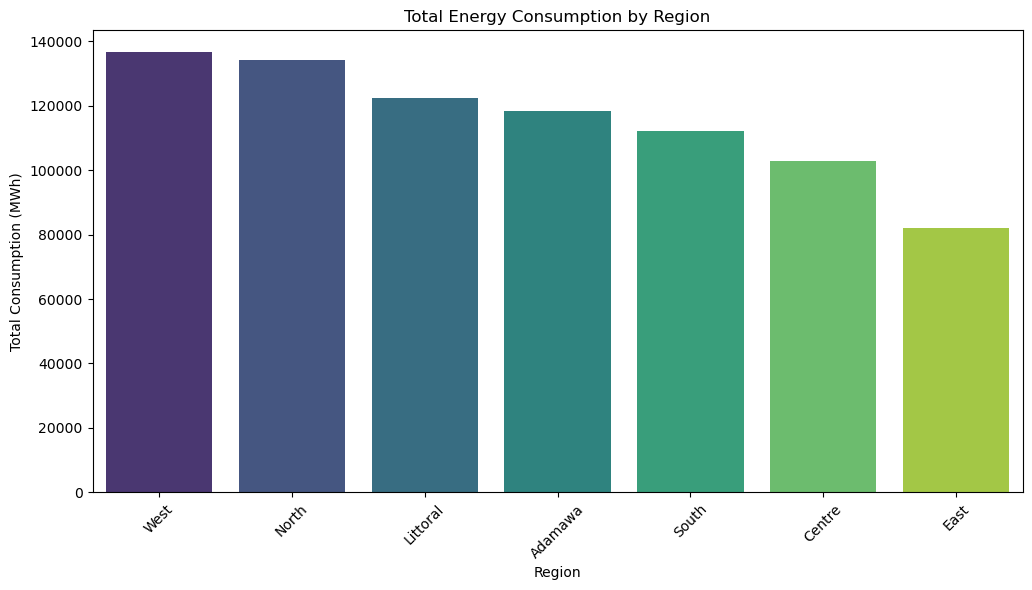

In [38]:
# Query: Total energy consumption by region
query = """
SELECT 
    loc.region, 
    SUM(cons.total_consumption_MWh) AS total_consumption
FROM consumption_dim cons
JOIN location_dim loc ON cons.city = loc.city
GROUP BY loc.region
ORDER BY total_consumption DESC
"""
consumption_by_region = spark.sql(query).toPandas()

# Visualization: Bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=consumption_by_region, x="region", y="total_consumption", palette="viridis")
plt.title("Total Energy Consumption by Region")
plt.xlabel("Region")
plt.ylabel("Total Consumption (MWh)")
plt.xticks(rotation=45)
plt.show()

### Renewable vs. Non-Renewable Energy Potential (Pie Chart)

This cell calculates the total energy potential (`total_potential_kW`) for renewable and non-renewable sources across all regions. The results are visualized using a pie chart, showing the proportion of renewable vs. non-renewable energy potential.

**Output**: A pie chart showing the proportion of renewable vs. non-renewable energy potential.

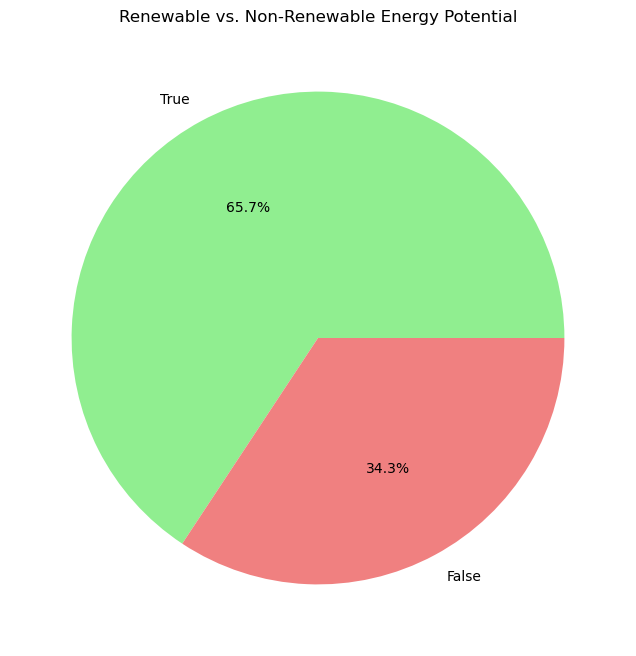

In [39]:
# Query: Renewable vs. non-renewable energy potential
query = """
SELECT 
    renewable, 
    SUM(potential_kW) AS total_potential
FROM energy_sources_dim
GROUP BY renewable
"""
energy_potential = spark.sql(query).toPandas()

# Visualization: Pie chart
plt.figure(figsize=(8, 8))
plt.pie(energy_potential["total_potential"], labels=energy_potential["renewable"], autopct="%1.1f%%", colors=["lightgreen", "lightcoral"])
plt.title("Renewable vs. Non-Renewable Energy Potential")
plt.show()

### Energy Consumption by Year and Region (Stacked Bar Chart)

This cell calculates the total energy consumption (`total_consumption_MWh`) for each year and region by joining the `consumption_dim` and `location_dim` tables. The results are visualized using a stacked bar chart, showing how energy consumption varies by year and region.

**Output**: A stacked bar chart showing energy consumption by year and region.

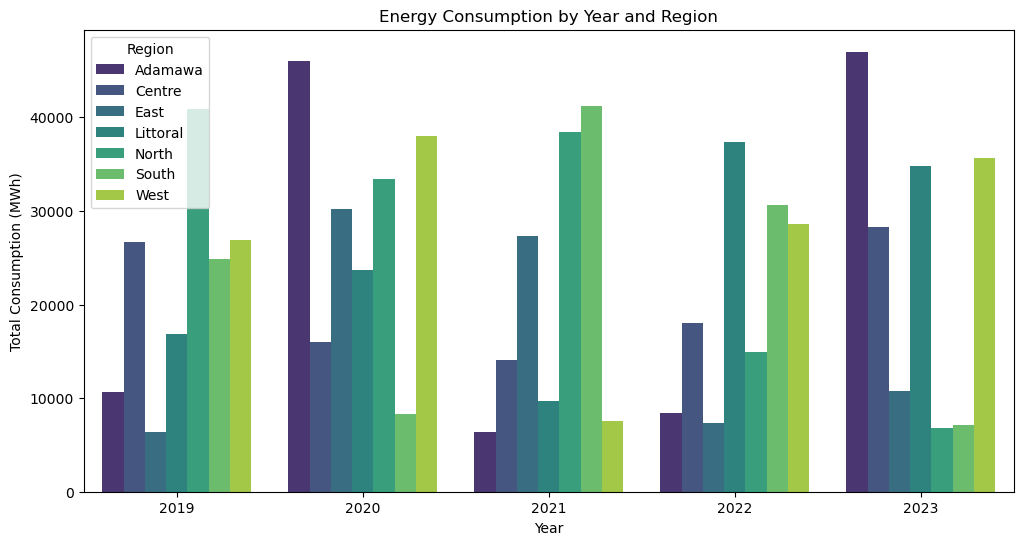

In [40]:
# Query: Energy consumption by year and region
query = """
SELECT 
    cons.year, 
    loc.region, 
    SUM(cons.total_consumption_MWh) AS total_consumption
FROM consumption_dim cons
JOIN location_dim loc ON cons.city = loc.city
GROUP BY cons.year, loc.region
ORDER BY cons.year, loc.region
"""
consumption_by_year_region = spark.sql(query).toPandas()

# Visualization: Stacked bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=consumption_by_year_region, x="year", y="total_consumption", hue="region", palette="viridis")
plt.title("Energy Consumption by Year and Region")
plt.xlabel("Year")
plt.ylabel("Total Consumption (MWh)")
plt.legend(title="Region")
plt.show()

### Load Shedding Frequency by Region (Heatmap)

This cell calculates the total frequency of load shedding for each region from the `load_shedding_dim` table. The results are visualized using a heatmap, highlighting regions with frequent load shedding.

**Output**: A heatmap showing the total frequency of load shedding by region.

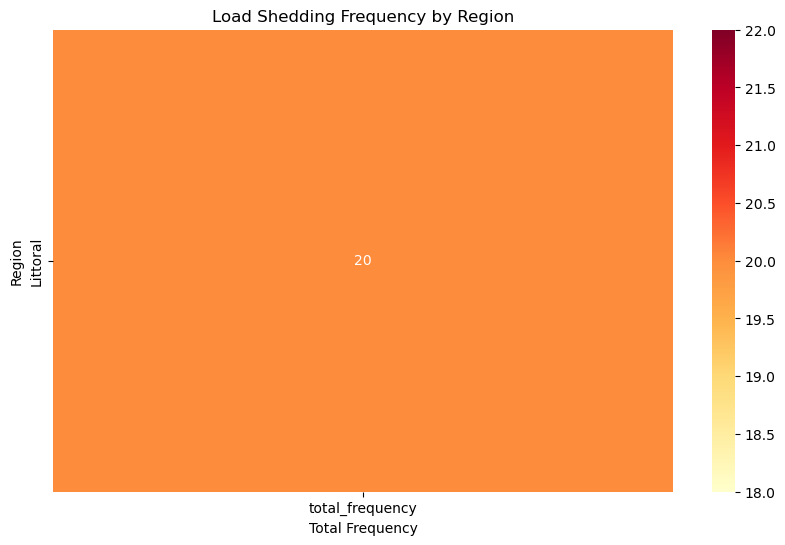

In [41]:
# Query: Load shedding frequency by region
query = """
SELECT 
    region, 
    SUM(frequency) AS total_frequency
FROM load_shedding_dim
GROUP BY region
ORDER BY total_frequency DESC
"""
load_shedding_frequency = spark.sql(query).toPandas()

# Visualization: Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(load_shedding_frequency.set_index("region"), annot=True, fmt="d", cmap="YlOrRd")
plt.title("Load Shedding Frequency by Region")
plt.xlabel("Total Frequency")
plt.ylabel("Region")
plt.show()

### Energy Efficiency Trends by Region (Line Chart)

This cell calculates the average energy savings (`avg_savings`) for each efficiency rating and region from the `energy_efficiency_dim` table. The results are visualized using a line chart, showing trends in energy efficiency over time for each region.

**Output**: A line chart showing energy efficiency trends by region.

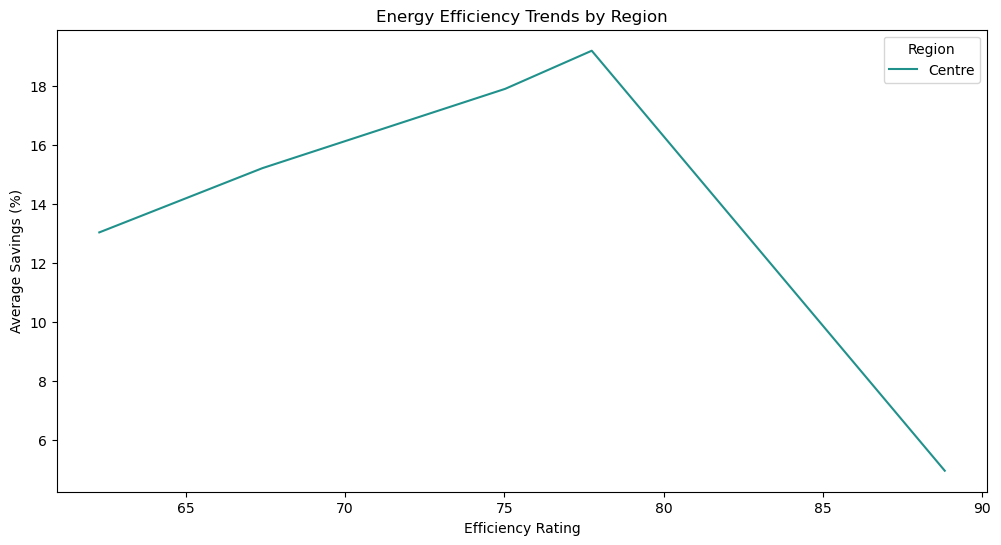

In [42]:
# Query: Energy efficiency trends by region
query = """
SELECT 
    region, 
    efficiency_rating, 
    AVG(energy_savings_percent) AS avg_savings
FROM energy_efficiency_dim
GROUP BY region, efficiency_rating
ORDER BY region, efficiency_rating
"""
efficiency_trends = spark.sql(query).toPandas()

# Visualization: Line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=efficiency_trends, x="efficiency_rating", y="avg_savings", hue="region", palette="viridis")
plt.title("Energy Efficiency Trends by Region")
plt.xlabel("Efficiency Rating")
plt.ylabel("Average Savings (%)")
plt.legend(title="Region")
plt.show()

### Peak Energy Demand by City (Bar Chart)

This cell calculates the peak energy demand (`peak_consumption_MW`) for each city from the `consumption_dim` table. The results are visualized using a bar chart, highlighting cities with the highest peak demand.

**Output**: A bar chart showing the peak energy demand for each city.

/tmp/ipykernel_609/2242394996.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=peak_demand_by_city, x="city", y="peak_demand", palette="viridis")


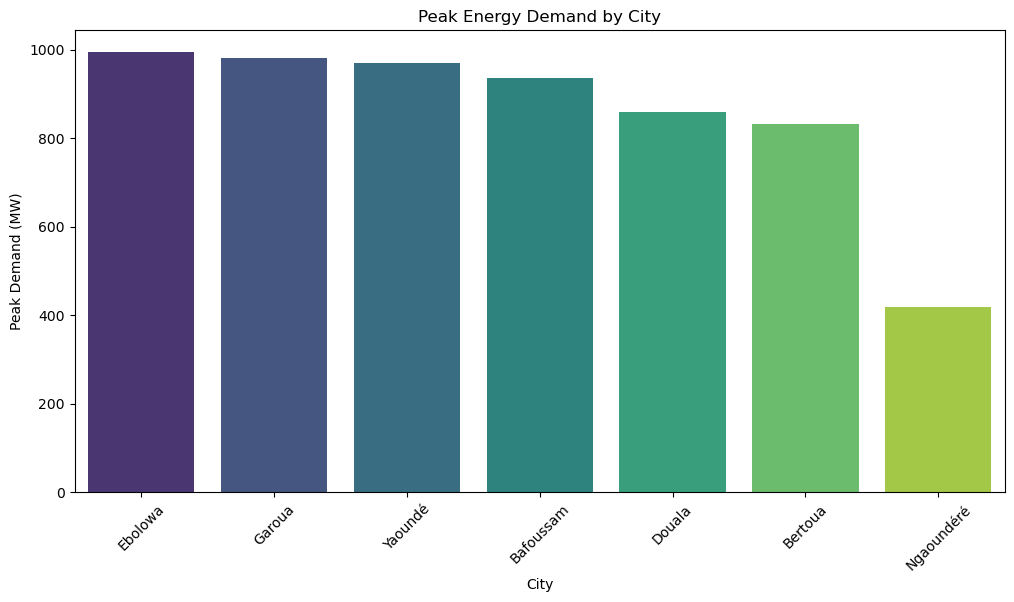

In [44]:
# Query: Peak demand by city
query = """
SELECT 
    city, 
    MAX(peak_consumption_MW) AS peak_demand
FROM consumption_dim
GROUP BY city
ORDER BY peak_demand DESC
"""
peak_demand_by_city = spark.sql(query).toPandas()

# Visualization: Bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=peak_demand_by_city, x="city", y="peak_demand", palette="viridis")
plt.title("Peak Energy Demand by City")
plt.xlabel("City")
plt.ylabel("Peak Demand (MW)")
plt.xticks(rotation=45)
plt.show()

## Recommendations for Energy Infrastructure Expansion and Sustainability Planning

Based on the analysis of energy consumption, demand forecasting, and infrastructure data, the following recommendations are proposed to improve energy sustainability and infrastructure in Cameroon:

---

### 1. **Expand Grid Infrastructure in High-Consumption Regions**
   - **Focus Areas**: West, North, and Littoral regions have the highest energy consumption. These regions require **additional grid capacity** to meet growing demand.
   - **Action Plan**:
     - Build new substations and transmission lines in high-demand areas.
     - Upgrade existing infrastructure to reduce losses and improve reliability.

---

### 2. **Invest in Renewable Energy Sources**
   - **Focus Areas**: Regions with high renewable energy potential (e.g., Centre, Littoral, and North) should prioritize investments in **solar, wind, and hydropower**.
   - **Action Plan**:
     - Develop solar farms in areas with high solar radiation (e.g., Bertoua, Bafoussam).
     - Expand hydropower projects in regions with suitable water resources.
     - Promote small-scale renewable energy projects for rural electrification.

---

### 3. **Mitigate Load Shedding in Affected Regions**
   - **Focus Areas**: Littoral region experiences the highest frequency of load shedding. Immediate action is needed to improve grid reliability.
   - **Action Plan**:
     - Implement **demand-side management** strategies to reduce peak demand.
     - Invest in **energy storage systems** (e.g., batteries) to stabilize the grid during peak periods.
     - Conduct regular maintenance to prevent outages.

---

### 4. **Promote Energy Efficiency Programs**
   - **Focus Areas**: Regions with low energy efficiency ratings (e.g., East) should adopt energy-saving measures.
   - **Action Plan**:
     - Launch awareness campaigns to promote energy-efficient appliances and practices.
     - Provide incentives for businesses and households to adopt energy-saving technologies.
     - Retrofit public buildings with energy-efficient lighting and HVAC systems.

---

### 5. **Address Temperature-Driven Energy Demand**
   - **Focus Areas**: Cities with high temperatures (e.g., Garoua, Yaoundé) experience increased energy demand due to cooling needs.
   - **Action Plan**:
     - Promote the use of energy-efficient cooling systems (e.g., inverter ACs).
     - Implement **green building standards** to reduce cooling requirements.
     - Encourage the use of passive cooling techniques (e.g., shading, ventilation).

---

### 6. **Enhance Data-Driven Decision Making**
   - **Focus Areas**: Leverage big data and analytics to improve energy planning and resource allocation.
   - **Action Plan**:
     - Establish a centralized **energy data platform** to monitor consumption, demand, and infrastructure performance.
     - Use predictive analytics to forecast future energy needs and plan infrastructure investments.
     - Regularly update energy policies based on data-driven insights.

---

### 7. **Encourage Public-Private Partnerships**
   - **Focus Areas**: Collaborate with private sector stakeholders to accelerate energy infrastructure development.
   - **Action Plan**:
     - Offer incentives for private companies to invest in renewable energy projects.
     - Facilitate partnerships for grid modernization and expansion.
     - Promote innovation in energy technologies through research and development grants.

---

### Conclusion
By implementing these recommendations, Cameroon can achieve a more **sustainable, reliable, and efficient energy system**. These actions will not only address current challenges but also pave the way for long-term energy security and economic growth.